<a href="https://colab.research.google.com/github/Uzayisenga/DIC-WebEngeeringCourse/blob/master/pregnancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
from sklearn.model_selection import train_test_split


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('Pregnancy  - 13100166.csv')

In [24]:
df.head()

,REF_DATE,GEO,DGUID,Age group,Teen pregnancy outcomes,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1998.0,Ghana,NaN,15 to 19 years,"Total, teen pregnancies",Number of events,Number,223.0,units,0.0,v4384837,1.1.1.1,41588.0,NaN,NaN,NaN,0.0
1,1998.0,Ghana,NaN,15 to 19 years,"Total, teen pregnancies","Rate per 1,000 females","Rates per 1,000 females",266.0,units,0.0,v4384838,1.1.1.2,41.7,NaN,NaN,NaN,1.0
2,1998.0,Ghana,NaN,15 to 19 years,Live births,Number of events,Number,223.0,units,0.0,v4384839,1.1.2.1,19721.0,NaN,NaN,NaN,0.0
3,1998.0,Ghana,NaN,15 to 19 years,Live births,"Rate per 1,000 females","Rates per 1,000 females",266.0,units,0.0,v4384840,1.1.2.2,19.8,NaN,NaN,NaN,1.0
4,1998.0,Ghana,NaN,15 to 19 years,Induced abortions,Number of events,Number,223.0,units,0.0,v4384841,1.1.3.1,20859.0,NaN,NaN,NaN,0.0


In [25]:

df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Age group', 'Teen pregnancy outcomes',
       'Characteristics', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID',
       'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED',
       'DECIMALS'],
      dtype='object')

In [26]:
df.drop('DGUID',axis=1,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 960 non-null    float64
 1   GEO                      960 non-null    object 
 2   Age group                960 non-null    object 
 3   Teen pregnancy outcomes  960 non-null    object 
 4   Characteristics          960 non-null    object 
 5   UOM                      960 non-null    object 
 6   UOM_ID                   960 non-null    float64
 7   SCALAR_FACTOR            960 non-null    object 
 8   SCALAR_ID                960 non-null    float64
 9   VECTOR                   960 non-null    object 
 10  COORDINATE               960 non-null    object 
 11  VALUE                    960 non-null    float64
 12  STATUS                   0 non-null      float64
 13  SYMBOL                   3 non-null      object 
 14  TERMINATED               4

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 960 non-null    float64
 1   GEO                      960 non-null    object 
 2   Age group                960 non-null    object 
 3   Teen pregnancy outcomes  960 non-null    object 
 4   Characteristics          960 non-null    object 
 5   UOM                      960 non-null    object 
 6   UOM_ID                   960 non-null    float64
 7   SCALAR_FACTOR            960 non-null    object 
 8   SCALAR_ID                960 non-null    float64
 9   VECTOR                   960 non-null    object 
 10  COORDINATE               960 non-null    object 
 11  VALUE                    960 non-null    float64
 12  STATUS                   0 non-null      float64
 13  SYMBOL                   3 non-null      object 
 14  TERMINATED               4

In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
REF_DATE,960.0,1999.025000,0.821631,1998.0,1998.0,1999.00,2000.00,2000.0
UOM_ID,960.0,244.500000,21.511207,223.0,223.0,244.50,266.00,266.0
SCALAR_ID,960.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0
VALUE,960.0,1018.092188,3596.042522,0.0,13.7,39.85,271.75,41588.0
STATUS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DECIMALS,960.0,0.500000,0.500261,0.0,0.0,0.50,1.00,1.0


In [30]:
df.shape

(969, 16)

In [31]:
df.columns

Index(['REF_DATE', 'GEO', 'Age group', 'Teen pregnancy outcomes',
       'Characteristics', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID',
       'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED',
       'DECIMALS'],
      dtype='object')

In [32]:
pd.DataFrame((100*df.isnull().sum()/len(df)).sort_values(ascending=False),columns=['Null %'])

,Null %
STATUS,100.000000
SYMBOL,99.690402
TERMINATED,95.046440
REF_DATE,0.928793
GEO,0.928793
Age group,0.928793
Teen pregnancy outcomes,0.928793
Characteristics,0.928793
UOM,0.928793
UOM_ID,0.928793


In [33]:
df.drop(['STATUS','SYMBOL','TERMINATED'],axis=1,inplace=True)
df.head()

,REF_DATE,GEO,Age group,Teen pregnancy outcomes,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,1998.0,Ghana,15 to 19 years,"Total, teen pregnancies",Number of events,Number,223.0,units,0.0,v4384837,1.1.1.1,41588.0,0.0
1,1998.0,Ghana,15 to 19 years,"Total, teen pregnancies","Rate per 1,000 females","Rates per 1,000 females",266.0,units,0.0,v4384838,1.1.1.2,41.7,1.0
2,1998.0,Ghana,15 to 19 years,Live births,Number of events,Number,223.0,units,0.0,v4384839,1.1.2.1,19721.0,0.0
3,1998.0,Ghana,15 to 19 years,Live births,"Rate per 1,000 females","Rates per 1,000 females",266.0,units,0.0,v4384840,1.1.2.2,19.8,1.0
4,1998.0,Ghana,15 to 19 years,Induced abortions,Number of events,Number,223.0,units,0.0,v4384841,1.1.3.1,20859.0,0.0


In [34]:
sns.set_style('darkgrid')
sns.set_palette('summer_r')

<Axes: ylabel='count'>

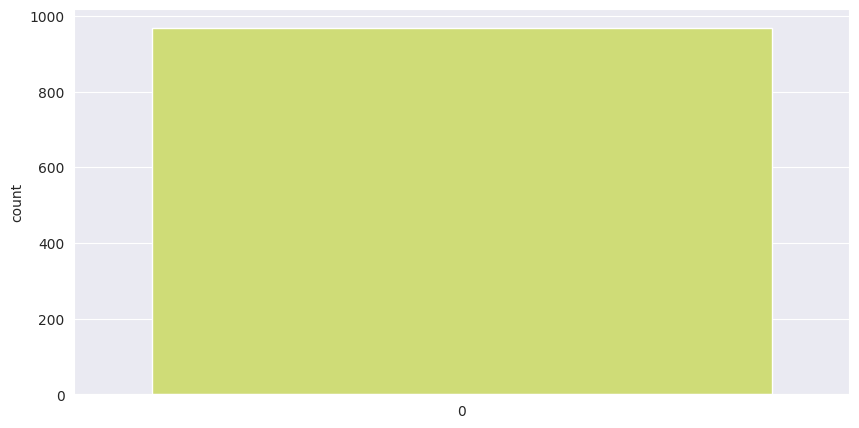

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(df['REF_DATE'])

Text(0.5, 1.0, 'Pie chart of Data Geography  Distribution')

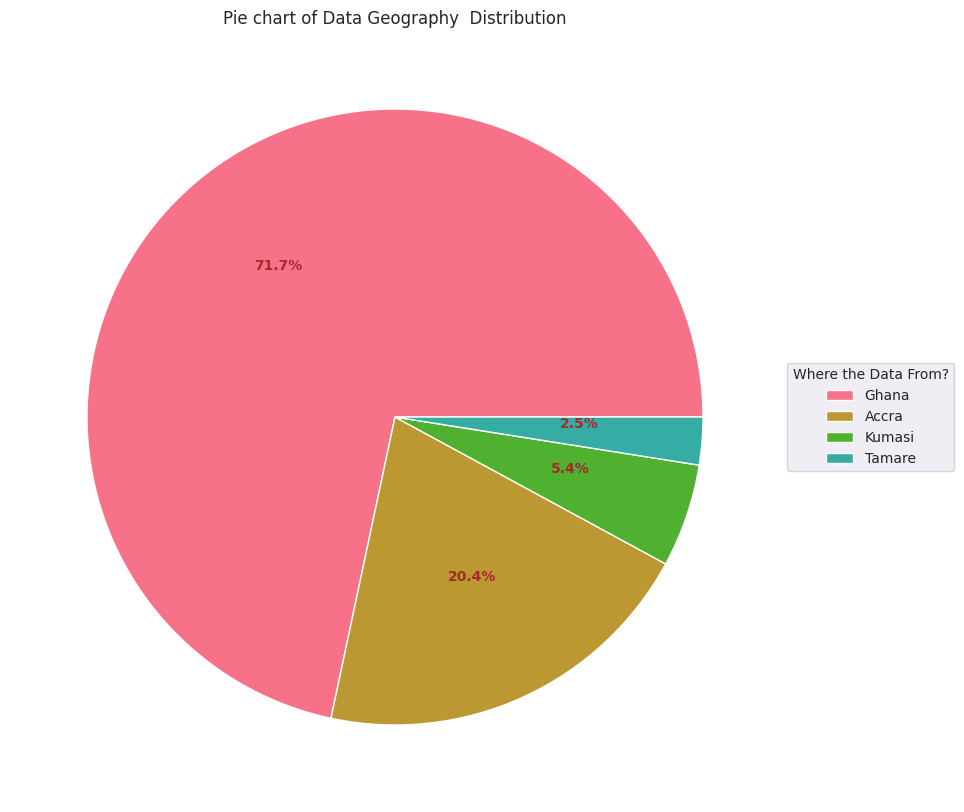

In [40]:
sns.set_palette('husl')
fig, ax = plt.subplots(figsize=(20,10), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n".format(pct)


wedges, texts, autotexts = ax.pie(df['GEO'].value_counts(), autopct=lambda pct: func(pct, df['GEO'].value_counts()),
                                 )

ax.legend(wedges, df['GEO'].unique(),
          title="Where the Data From?",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold",c='brown')

ax.set_title("Pie chart of Data Geography  Distribution")

Text(0.5, 1.0, 'Year Interval Chart')

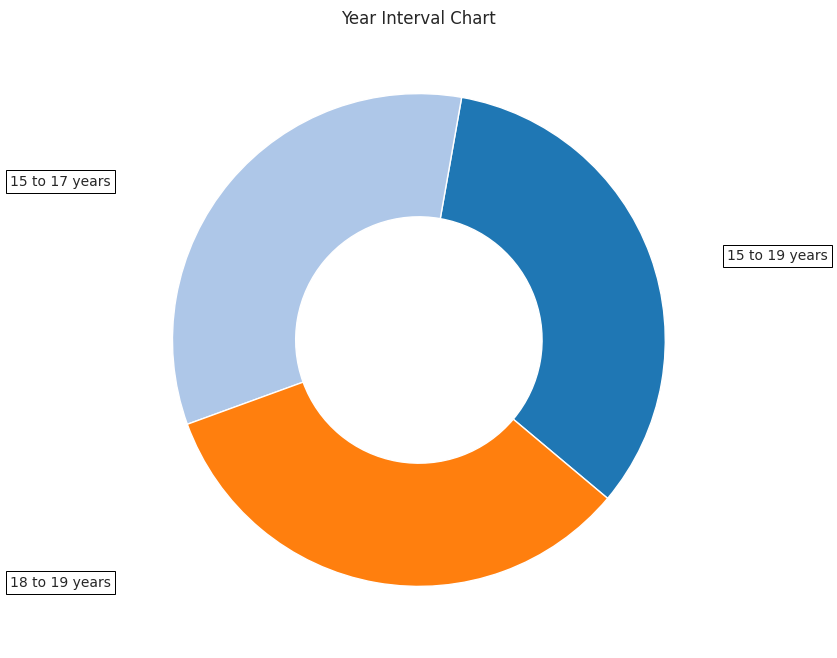

In [41]:
sns.set_palette('tab20')
fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(df['Age group'].value_counts(), wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

lbls = df['Age group'].unique()
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(lbls[i], xy=(x, y), xytext=(1.25*np.sign(x), 1*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Year Interval Chart")

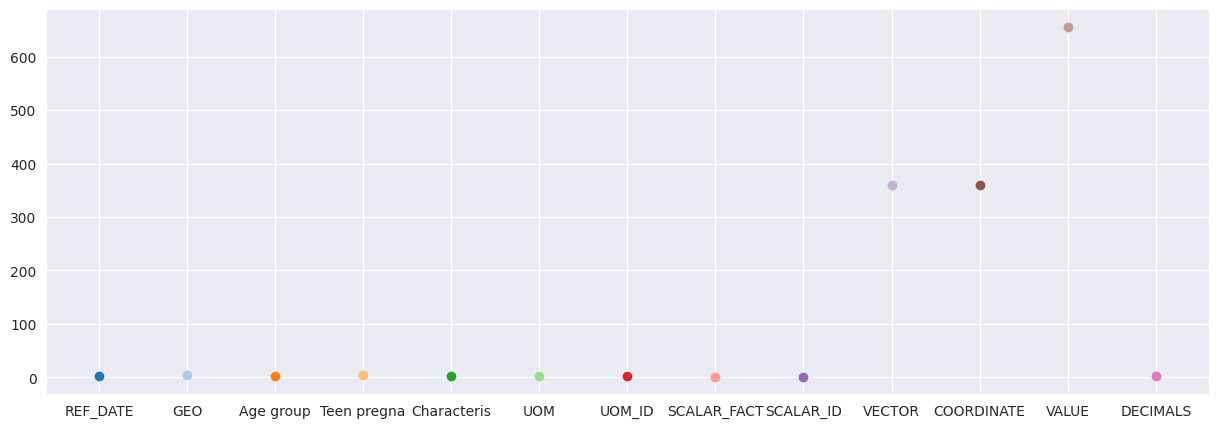

In [42]:
plt.figure(figsize=(15,5))
for ind,col in enumerate(df.columns):
    plt.scatter(df.columns[ind][:11],df[col].nunique())

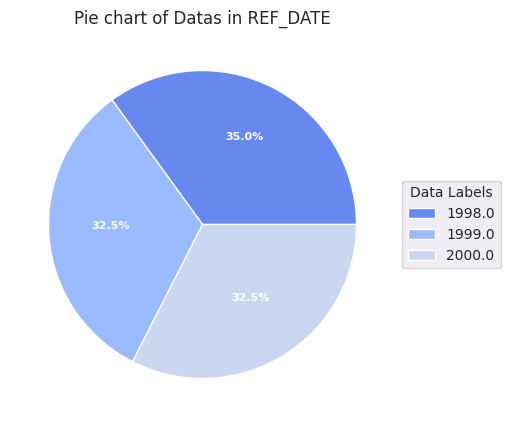

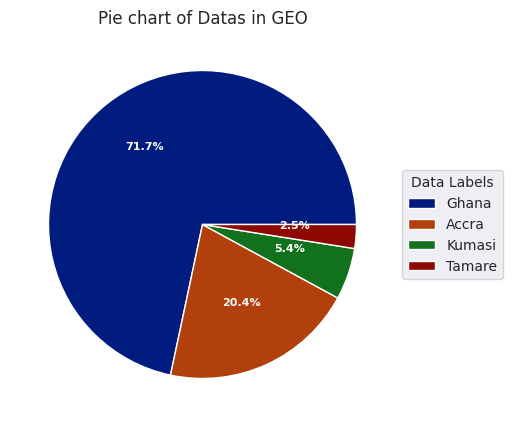

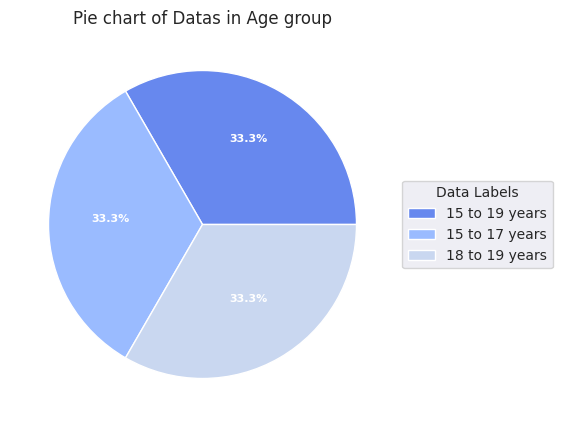

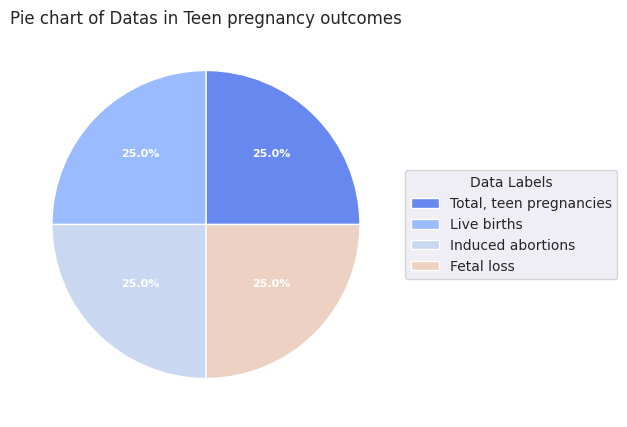

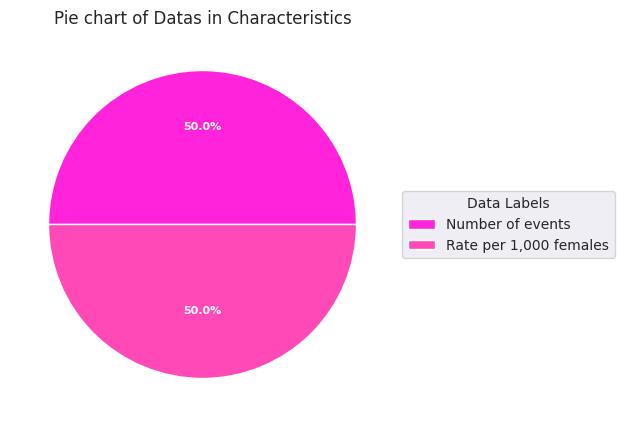

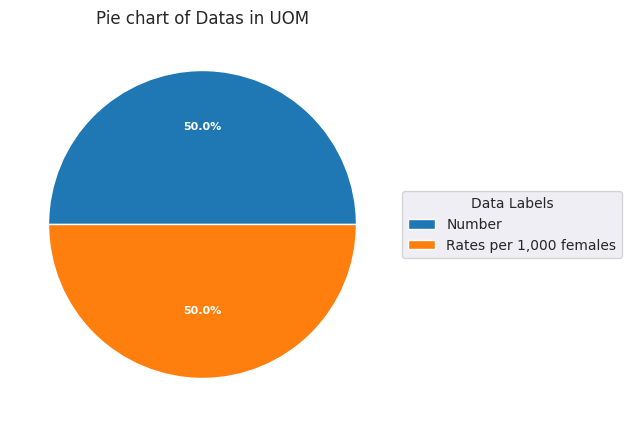

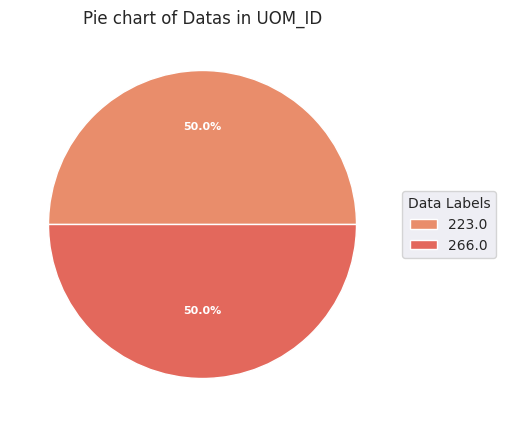

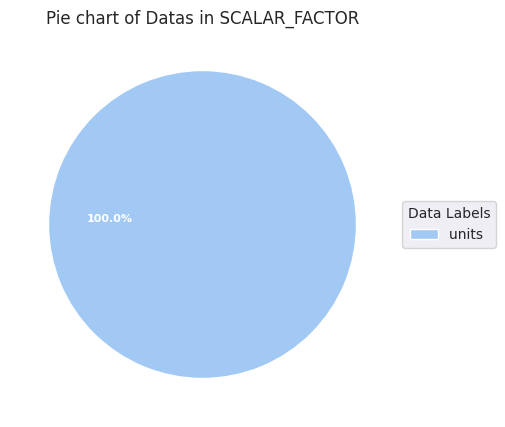

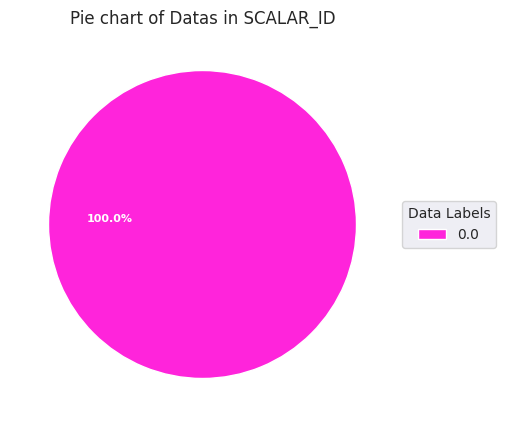

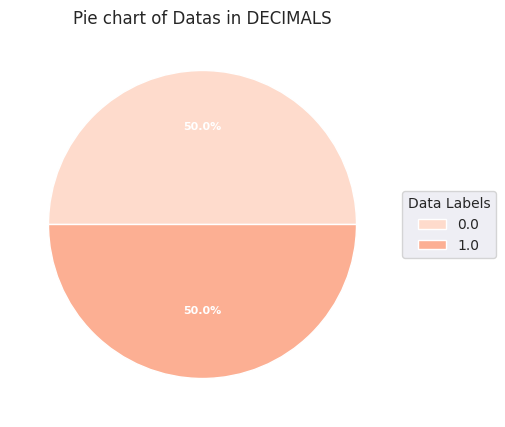

In [43]:
import random
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n".format(pct)

for  indx,col in enumerate(df.columns):
    if df[col].nunique() < 25:
        sns.set_palette(random.choice(['husl','coolwarm','tab10','pastel','dark','twilight','cividis','spring','Reds','flare']))
        fig, ax = plt.subplots(figsize=(10,5), subplot_kw=dict(aspect="equal"))
        wedges, texts, autotexts = ax.pie(df[col].value_counts(), autopct=lambda pct: func(pct, df[col].value_counts()),
                                  textprops=dict(color="w"))

        ax.legend(wedges, df[col].unique(),
        title="Data Labels",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1))

        plt.setp(autotexts, size=8, weight="bold")

        ax.set_title(f"Pie chart of Datas in {df.columns[indx]}")

In [44]:
df.drop(['SCALAR_FACTOR','SCALAR_ID'],axis=1,inplace=True)

In [45]:
df = pd.concat([df,pd.get_dummies(df[['UOM','UOM_ID','Characteristics','Age group']],drop_first=True)],axis=1).drop(['UOM','UOM_ID','Characteristics','Age group'],axis=1)
df.head()

,REF_DATE,GEO,Teen pregnancy outcomes,VECTOR,COORDINATE,VALUE,DECIMALS,"UOM_Rates per 1,000 females","Characteristics_Rate per 1,000 females",Age group_15 to 19 years,Age group_18 to 19 years
0,1998.0,Ghana,"Total, teen pregnancies",v4384837,1.1.1.1,41588.0,0.0,0,0,1,0
1,1998.0,Ghana,"Total, teen pregnancies",v4384838,1.1.1.2,41.7,1.0,1,1,1,0
2,1998.0,Ghana,Live births,v4384839,1.1.2.1,19721.0,0.0,0,0,1,0
3,1998.0,Ghana,Live births,v4384840,1.1.2.2,19.8,1.0,1,1,1,0
4,1998.0,Ghana,Induced abortions,v4384841,1.1.3.1,20859.0,0.0,0,0,1,0


In [46]:
df['Teen pregnancy outcomes'] = df['Teen pregnancy outcomes'].rank(method='dense')
df['GEO'] = df['GEO'].rank(method='dense')
df['REF_DATE'] = df['REF_DATE'].rank(method='dense')
df.head()

,REF_DATE,GEO,Teen pregnancy outcomes,VECTOR,COORDINATE,VALUE,DECIMALS,"UOM_Rates per 1,000 females","Characteristics_Rate per 1,000 females",Age group_15 to 19 years,Age group_18 to 19 years
0,1.0,2.0,4.0,v4384837,1.1.1.1,41588.0,0.0,0,0,1,0
1,1.0,2.0,4.0,v4384838,1.1.1.2,41.7,1.0,1,1,1,0
2,1.0,2.0,3.0,v4384839,1.1.2.1,19721.0,0.0,0,0,1,0
3,1.0,2.0,3.0,v4384840,1.1.2.2,19.8,1.0,1,1,1,0
4,1.0,2.0,2.0,v4384841,1.1.3.1,20859.0,0.0,0,0,1,0


<ipython-input-47-6540ddcc050f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='flare')


<Axes: >

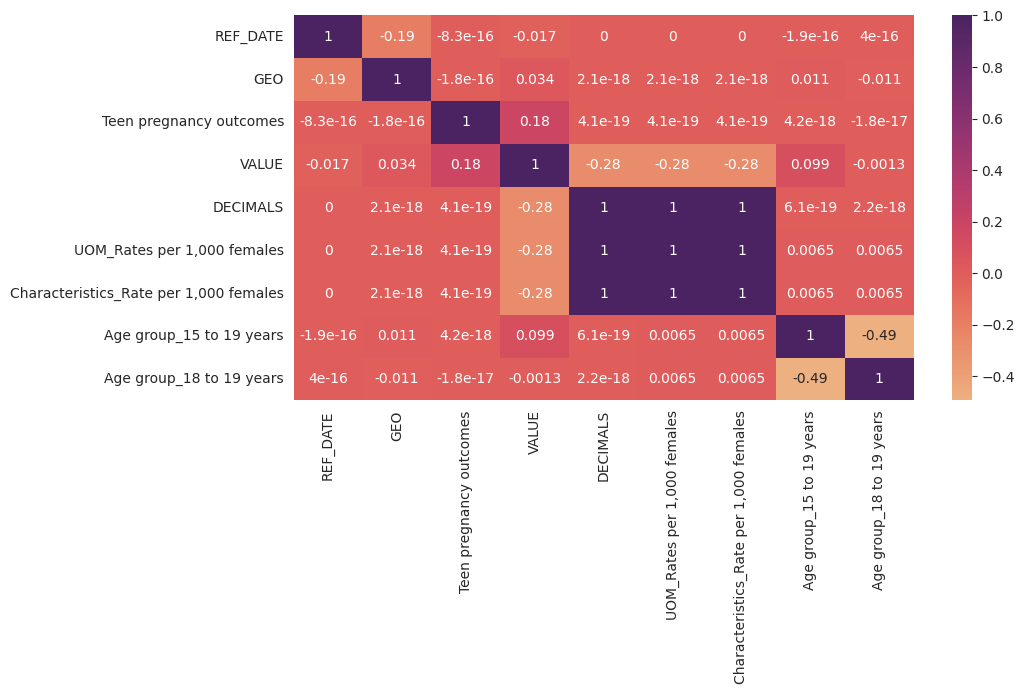

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='flare')

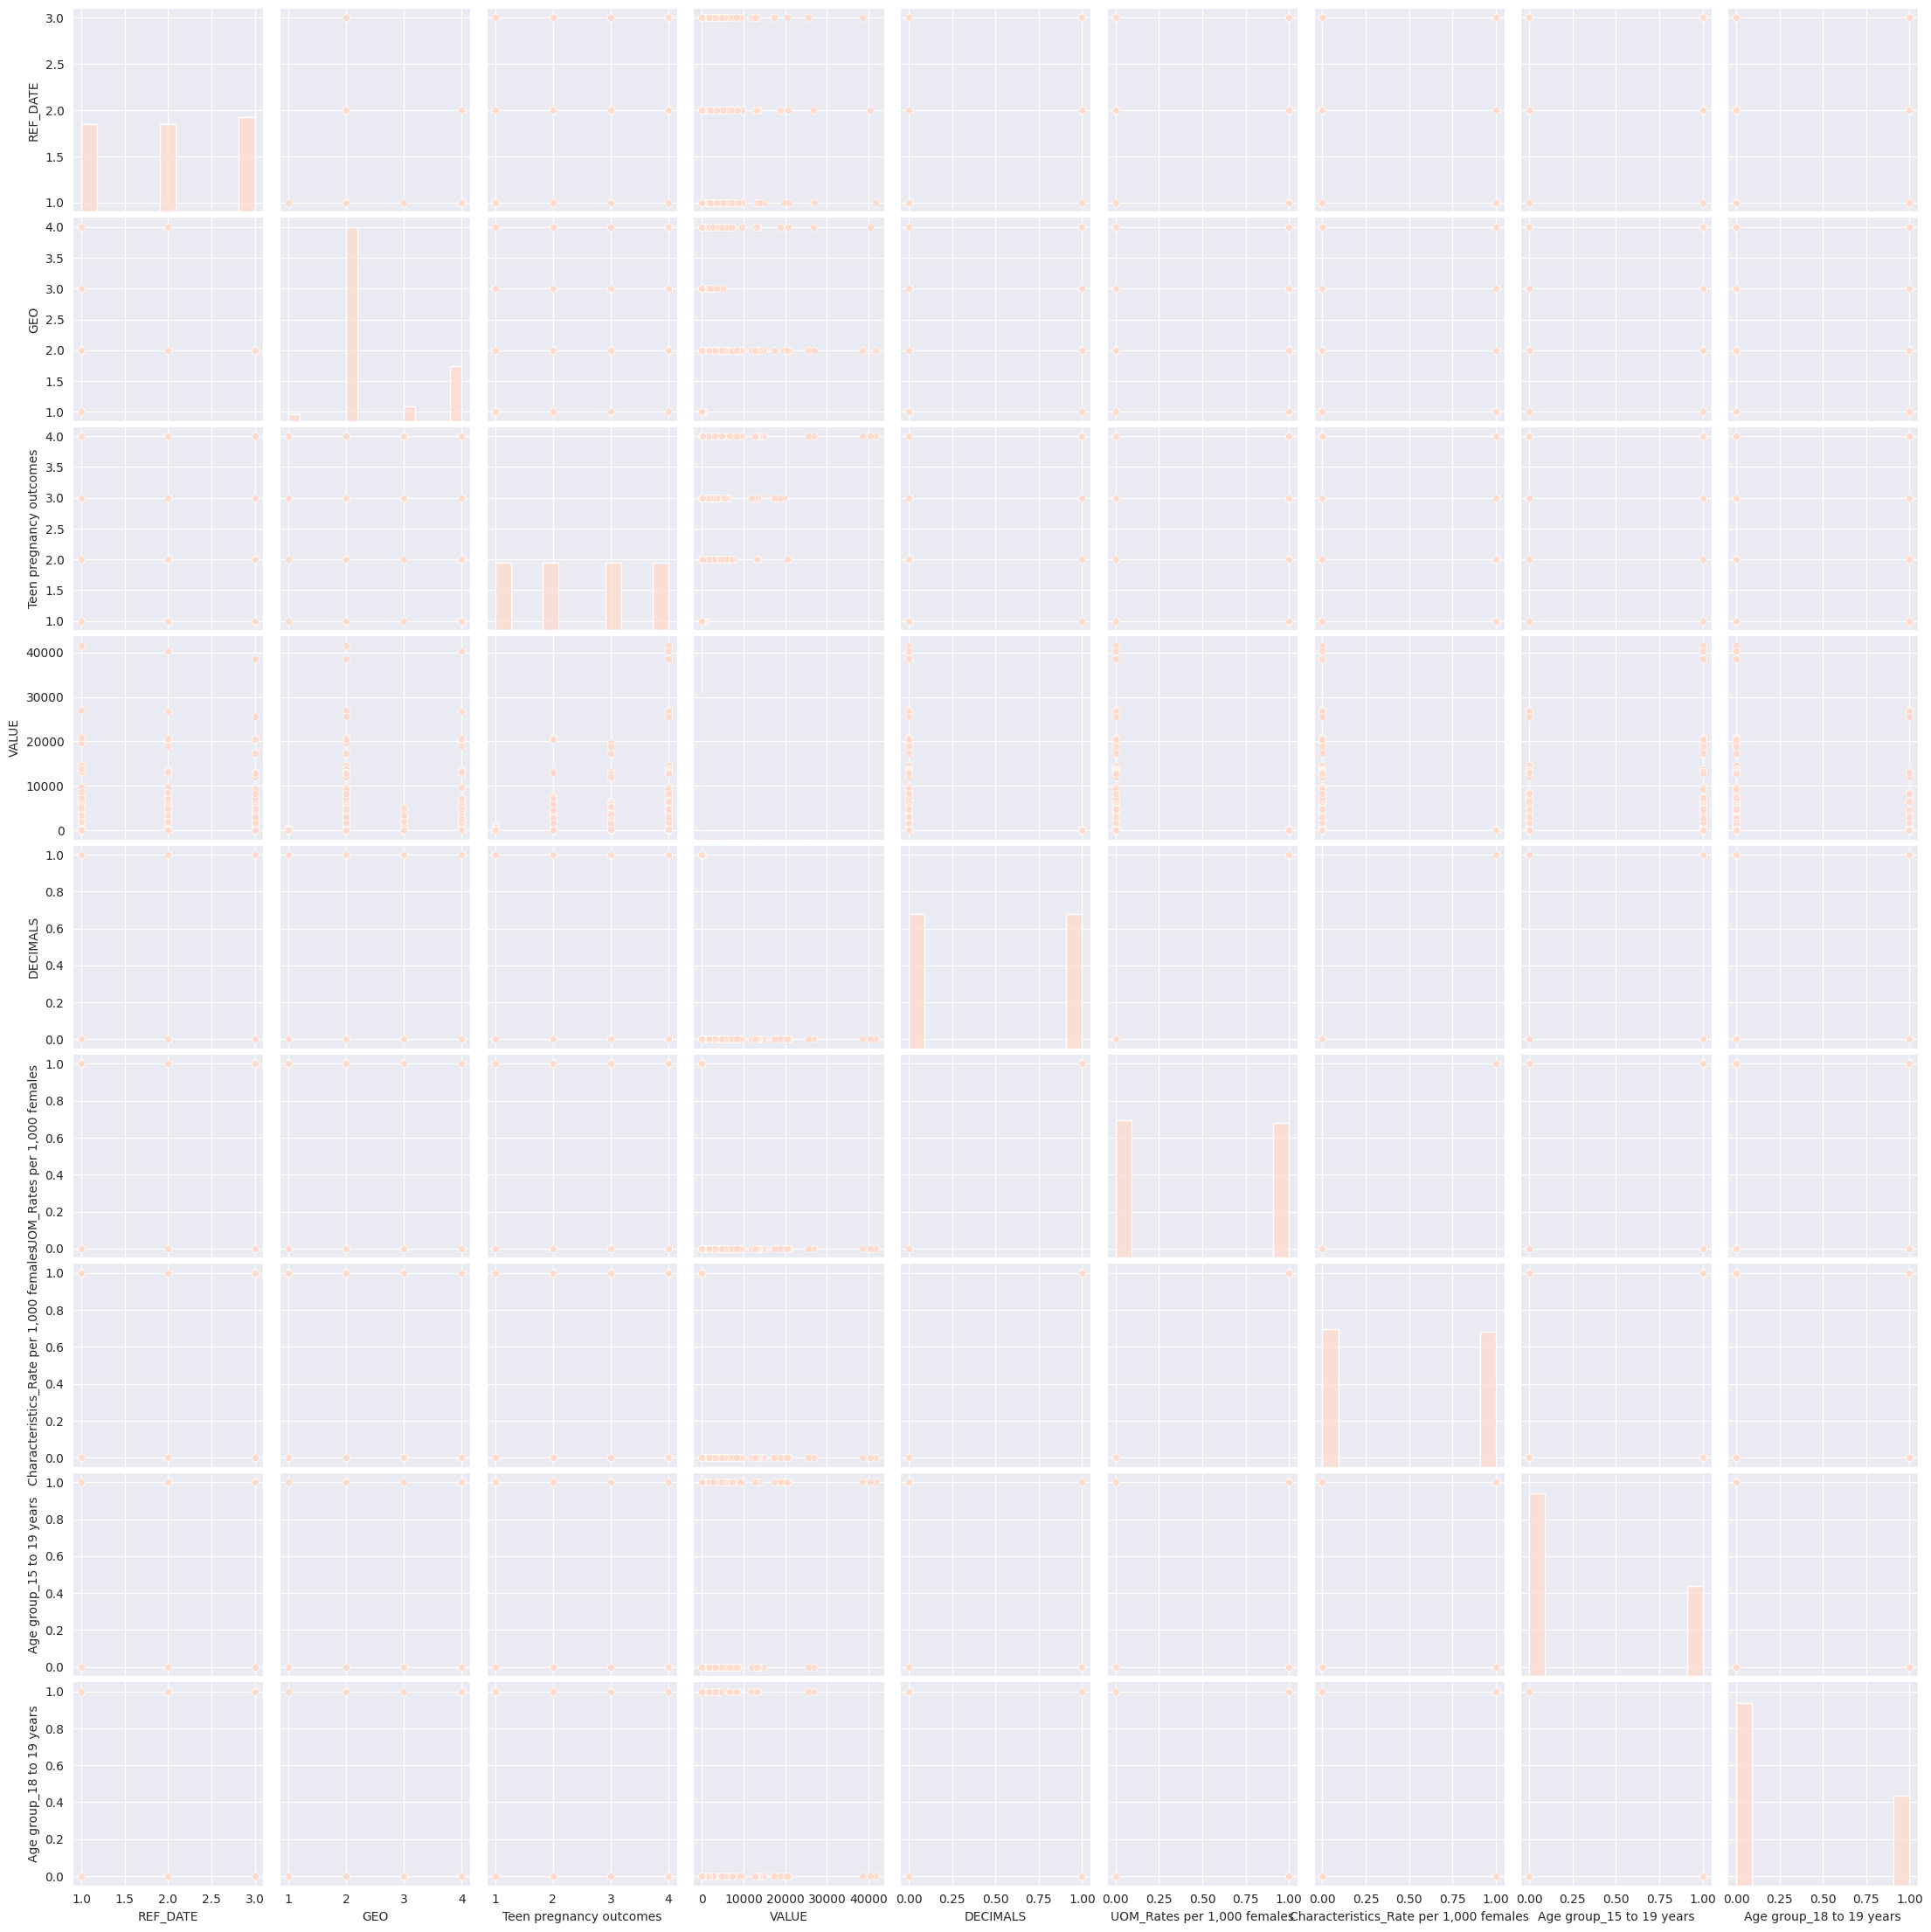

In [48]:
sns.pairplot(df)

In [50]:
print(df.columns)

Index(['REF_DATE', 'GEO', 'Teen pregnancy outcomes', 'VECTOR', 'COORDINATE',
       'VALUE', 'DECIMALS', 'UOM_Rates per 1,000 females',
       'Characteristics_Rate per 1,000 females', 'Age group_15 to 19 years',
       'Age group_18 to 19 years'],
      dtype='object')


In [54]:
print(df.columns.tolist())

['REF_DATE', 'GEO', 'Teen pregnancy outcomes', 'VECTOR', 'COORDINATE', 'VALUE', 'DECIMALS', 'UOM_Rates per 1,000 females', 'Characteristics_Rate per 1,000 females', 'Age group_15 to 19 years', 'Age group_18 to 19 years']


In [55]:
x = df[['Age group_15 to 19 years', 'Characteristics_Rate per 1,000 females', 'GEO', 'Teen pregnancy outcomes']]

In [57]:

y=df.iloc[:,-2]

In [58]:
y

0      1
1      1
2      1
3      1
4      1
      ..
964    0
965    0
966    0
967    0
968    0
Name: Age group_15 to 19 years, Length: 969, dtype: uint8

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=42)

In [62]:
xtrain = xtrain.dropna()
ytrain = ytrain.loc[xtrain.index]

In [63]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Replace NaNs with mean values
xtrain = imputer.fit_transform(xtrain)

In [64]:
model=DecisionTreeClassifier()


model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [66]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [72]:

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [84]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
xtest = imputer.fit_transform(xtest)
model.score(xtest,ytest)


1.0

<Axes: ylabel='count'>

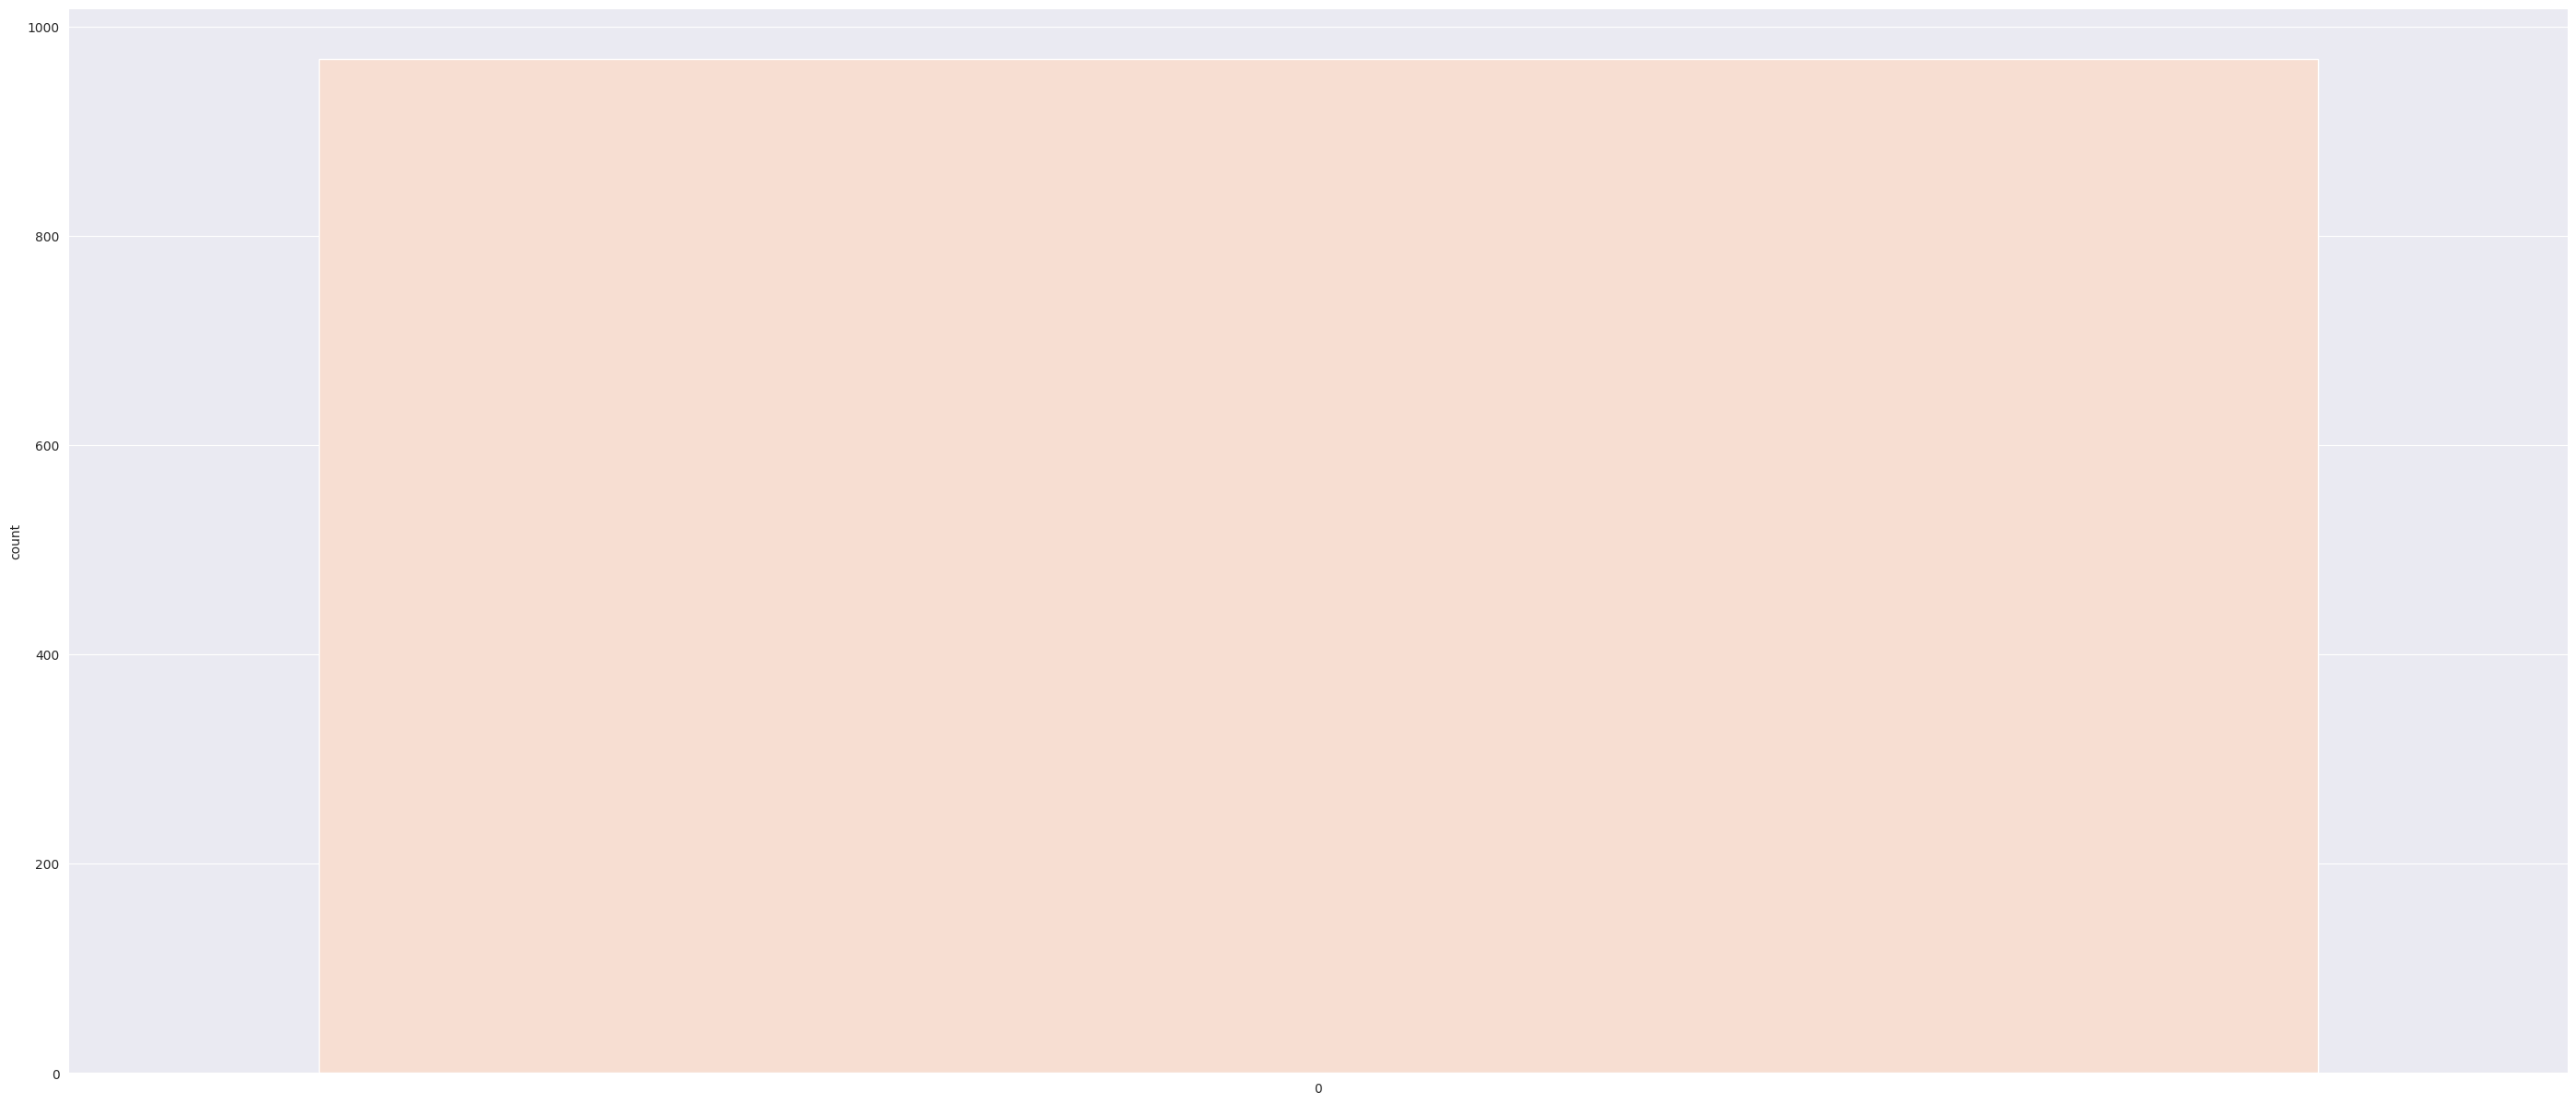

In [85]:
plt.figure(figsize=(35,15))
sns.countplot(df['GEO'])